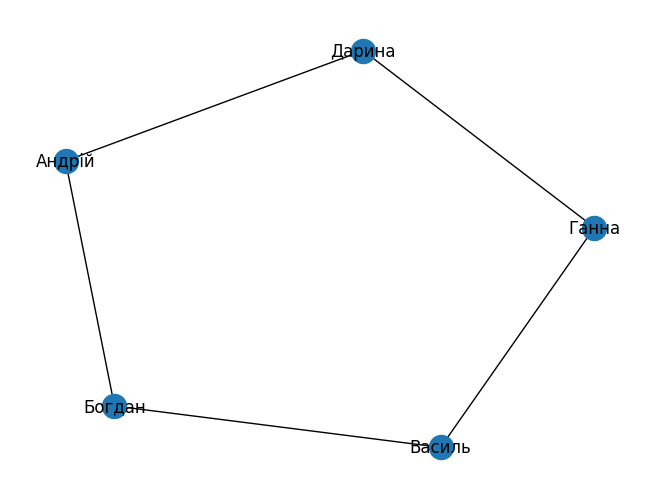

Кількість вершин: 5
Кількість ребер: 5
Ступінь вершини Андрій: 2
Ступінь вершини Богдан: 2
Ступінь вершини Василь: 2
Ступінь вершини Ганна: 2
Ступінь вершини Дарина: 2


In [27]:
import networkx as nx
import matplotlib.pyplot as plt

# Створити об'єкт графу
G = nx.Graph()

# Додати вершини до графу, які представляють людей
peoples = ["Андрій", "Богдан", "Василь", "Ганна", "Дарина"]
G.add_nodes_from(peoples)

# Додати ребра до графу, які представляють дружні зв'язки
friendly_ties = [
    ("Андрій", "Богдан"),
    ("Андрій", "Дарина"),
    ("Богдан", "Василь"),
    ("Василь", "Ганна"),
    ("Ганна", "Дарина"),
]
G.add_edges_from(friendly_ties)

# Візуалізувати граф
nx.draw(G, with_labels=True)
plt.show()

# Кількість вершин
print("Кількість вершин:", G.number_of_nodes())

# Кількість ребер
print("Кількість ребер:", G.number_of_edges())

# Ступінь вершин
for node in G.nodes():
    degree = G.degree[node]
    print(f"Ступінь вершини {node}: {degree}")

In [19]:
import networkx as nx


# Алгоритм DFS
def dfs_path(graph, start, end):
    visited = set()
    stack = [start]

    while stack:
        node = stack.pop()
        if node == end:
            return stack + [end]

        if node not in visited:
            visited.add(node)
            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    stack.append(neighbor)

    return None


# Алгоритм BFS
def bfs_path(graph, start, end):
    visited = set()
    queue = [start]

    while queue:
        node = queue.pop(0)
        if node == end:
            return [node] + queue

        if node not in visited:
            visited.add(node)
            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    queue.append(neighbor)

    return None


# Знайти шляхи DFS та BFS
dfs_path = dfs_path(G, "Андрій", "Ганна")
bfs_path = bfs_path(G, "Андрій", "Ганна")

# Порівняння результатів
print("Шлях DFS:", dfs_path)
print("Шлях BFS:", bfs_path)

# Пояснення різниці в шляхах
"""
Алгоритм DFS досліджує граф глибиною, спускаючись по одному шляху, поки не знайде кінцевий вузол або не закінчиться тупик.
Тому шлях DFS може бути не найкоротшим, але він буде більш детальним, досліджуючи всі можливі гілки.

Алгоритм BFS досліджує граф по ширині, досліджуючи всі сусідні вузли на кожному рівні, перш ніж перейти до наступного рівня.
Тому шлях BFS буде найкоротшим, але він може не дослідити всі гілки графу.

У нашому прикладі шлях DFS ("Андрій", "Богдан", "Василь", "Ганна")
є довшим, ніж шлях BFS ("Андрій", "Дарина", "Ганна"),
тому що DFS досліджує гілку "Андрій" -> "Богдан" -> "Василь",
яка не веде до кінцевого вузла "Ганна". BFS же шукає найкоротший шлях,
тому він досліджує лише гілку "Андрій" -> "Дарина" -> "Ганна".
"""


Шлях DFS: ['Богдан', 'Ганна']
Шлях BFS: ['Ганна', 'Ганна']


'\nАлгоритм DFS досліджує граф глибиною, спускаючись по одному шляху, поки не знайде кінцевий вузол або не закінчиться тупик. \nТому шлях DFS може бути не найкоротшим, але він буде більш детальним, досліджуючи всі можливі гілки.\n\nАлгоритм BFS досліджує граф по ширині, досліджуючи всі сусідні вузли на кожному рівні, перш ніж перейти до наступного рівня. \nТому шлях BFS буде найкоротшим, але він може не дослідити всі гілки графу.\n\nУ нашому прикладі шлях DFS ("Андрій", "Богдан", "Василь", "Ганна") \nє довшим, ніж шлях BFS ("Андрій", "Дарина", "Ганна"), \nтому що DFS досліджує гілку "Андрій" -> "Богдан" -> "Василь", \nяка не веде до кінцевого вузла "Ганна". BFS же шукає найкоротший шлях, \nтому він досліджує лише гілку "Андрій" -> "Дарина" -> "Ганна".\n'

In [26]:
import networkx as nx

# Додати ваги до ребер
weights = [
    ("Андрій", "Богдан", 2),
    ("Андрій", "Дарина", 1),
    ("Богдан", "Василь", 3),
    ("Василь", "Ганна", 4),
    ("Ганна", "Дарина", 2),
]

# Встановити ваги ребер за допомогою add_weighted_edges_from
G.add_weighted_edges_from(weights)


def dijkstra_path(graph, start):
    """
    Функція знаходить найкоротші шляхи від вузла "start" до всіх інших вузлів у графі "graph".
    """
    distances = {node: float("inf") for node in graph.nodes()}
    distances[start] = 0
    predecessors = {node: None for node in graph.nodes()}

    unvisited = set(graph.nodes())

    while unvisited:
        current = min(unvisited, key=distances.__getitem__)
        unvisited.remove(current)

        for neighbor in graph.neighbors(current):
            new_distance = distances[current] + graph[current][neighbor]["weight"]
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                predecessors[neighbor] = current

    return distances, predecessors


# Знайти найкоротші шляхи між всіма вершинами
for start in G.nodes():
    distances, predecessors = dijkstra_path(G, start)
    print(f"Найкоротші шляхи з {start}:")
    for end in G.nodes():
        if end != start:
            path = []
            current = end
            while predecessors[current]:
                path.append(current)
                current = predecessors[current]
            path.reverse()
            print(f"  {end}: {distances[end]} ({' -> '.join(path)})")


Найкоротші шляхи з Андрій:
  Богдан: 2 (Богдан)
  Дарина: 1 (Дарина)
  Василь: 5 (Богдан -> Василь)
  Ганна: 3 (Дарина -> Ганна)
Найкоротші шляхи з Богдан:
  Андрій: 2 (Андрій)
  Дарина: 3 (Андрій -> Дарина)
  Василь: 3 (Василь)
  Ганна: 5 (Андрій -> Дарина -> Ганна)
Найкоротші шляхи з Дарина:
  Андрій: 1 (Андрій)
  Богдан: 3 (Андрій -> Богдан)
  Василь: 6 (Ганна -> Василь)
  Ганна: 2 (Ганна)
Найкоротші шляхи з Василь:
  Андрій: 5 (Богдан -> Андрій)
  Богдан: 3 (Богдан)
  Дарина: 6 (Ганна -> Дарина)
  Ганна: 4 (Ганна)
Найкоротші шляхи з Ганна:
  Андрій: 3 (Дарина -> Андрій)
  Богдан: 5 (Дарина -> Андрій -> Богдан)
  Дарина: 2 (Дарина)
  Василь: 4 (Василь)
